<a href="https://colab.research.google.com/github/kehrlin/QLC240L14RN.Gen/blob/main/Excercise_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install netcdf4
import netCDF4
import urllib.request as urllib2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.6 MB/s eta 0:00:00


An ocean glider is an underwater fully automated vehicle. Similar to a submarine it changes its bouancy to move up or down, and wings to move side to side. Ocean gliders measure temperature, salinity, currents and even levels of chloraphyll to measure how much primary producer activity is in the water.

In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime
from io import StringIO
# Retreive data from the "glider" server
response = urllib2.urlopen('http://glider.ceotr.ca/data/live/otn200_sci_water_sal_live.csv')
data = response.read().decode('utf-8')  # Decode the response to a string
data = StringIO(data)

In [3]:
r = csv.DictReader(data)

In [4]:
date, lat, lon, depth, temp = [],[],[],[],[]

In [5]:
for row in r:
    date.append(float(row['unixtime']))
    lat.append(float(row['lat']))
    lon.append(float(row['lon']))
    depth.append(float(row['depth']))
    temp.append(float(row['sci_water_sal']))

In [6]:
DATE = []
for row in date:
    DATE.append(datetime.datetime.fromtimestamp(row))


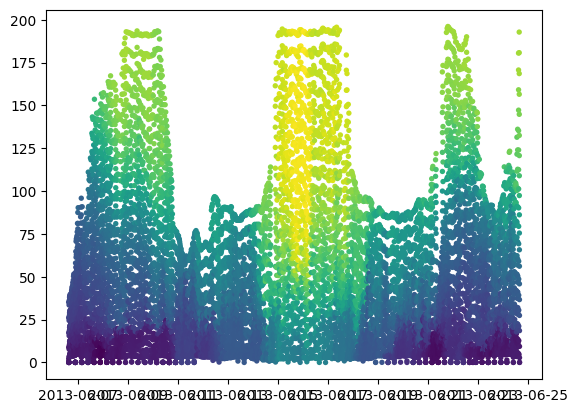

In [7]:
fig, ax1 = plt.subplots(1)
plt.scatter(DATE,depth,s=15,c=temp,marker='o', edgecolor='none')

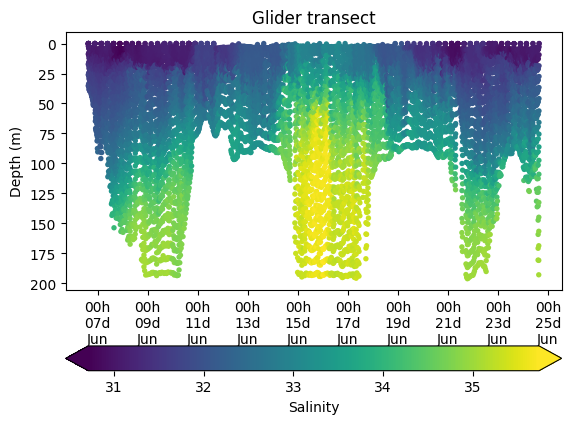

In [9]:
fig, ax1 = plt.subplots(1)
mappable = ax1.scatter(DATE,depth,s=15,c=temp,marker='o', edgecolor='none')
ax1.set_ylim(ax1.get_ylim()[::-1])
cbar = plt.colorbar(mappable, ax=ax1, orientation='horizontal', extend='both')
xfmt = md.DateFormatter('%Hh\n%dd\n%b')
ax1.xaxis.set_major_formatter(xfmt)
cbar.ax.set_xlabel('Salinity')
plt.title('Glider transect')
plt.ylabel('Depth (m)')
plt.show()

This shows us the level of salinity in water at varying depths on a spread of days. One thing that I've noticed from this is that at between 0-25m, there is very low salinity, EXCEPT for between the 13-19th of June, where salinity is overall higher.

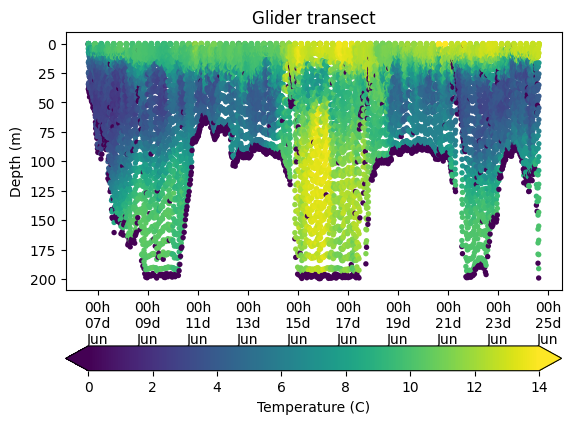

In [11]:
# Make plot
fig, ax1 = plt.subplots(1)
plt.scatter(DATE,depth,s=15,c=temp,marker='o', edgecolor='none')
#plt.ylim((-0.5,max(depth)+5))
ax1.set_ylim(ax1.get_ylim()[::-1])
cbar = plt.colorbar(orientation='horizontal', extend='both')
xfmt = md.DateFormatter('%Hh\n%dd\n%b')
ax1.xaxis.set_major_formatter(xfmt)
cbar.ax.set_xlabel('Temperature (C)') # Changed ser_xlabel to set_xlabel
plt.title('Glider transect')
plt.ylabel('Depth (m)')
plt.show()

In [12]:
#install cmocean package
!pip install cmocean
#import cmocean package
import cmocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 6.7 MB/s eta 0:00:00


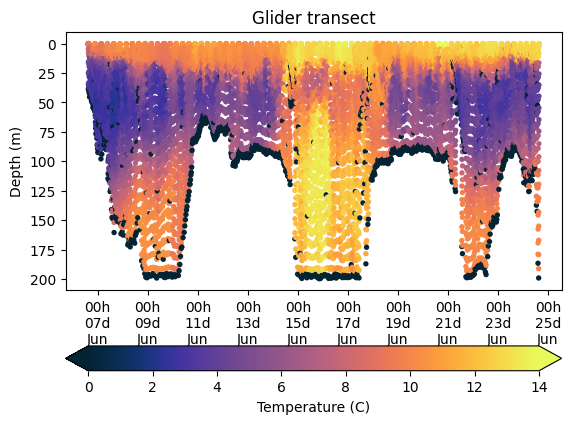

In [20]:
# Make plot
fig, ax1 = plt.subplots(1)
plt.scatter(DATE,depth,s=15,c=temp,marker='o', edgecolor='none',cmap=cmocean.cm.thermal)
#plt.ylim((-0.5,max(depth)+5))
ax1.set_ylim(ax1.get_ylim()[::-1])
cbar = plt.colorbar(orientation='horizontal', extend='both')
xfmt = md.DateFormatter('%Hh\n%dd\n%b')
ax1.xaxis.set_major_formatter(xfmt)
cbar.ax.set_xlabel('Temperature (C)') # Changed ser_xlabel to set_xlabel
plt.title('Glider transect')
plt.ylabel('Depth (m)')
plt.show()

**What does this figure show you?** The figure above shows me the temperature related to depth over a spread of days in a water sample collected by an ocean glider.

**What can we gather from both of these figures about the water column?** From the temperature graph we see that the water on average is warmer the closer it is to the surface, and during the middle of June, the water is warmer in both graphs. We also see that similarly to salinity, the deeper we go down into the water, the higher salinity is.There is also what appears to be a distinct lack of activity between 25-75 meters, in both salinity and temperature.
**Why might gliders be useful for atmospheric and ocean circulation models/predictions?** They might be useful for the circulation models because they can go out and collect a large sample of data over a long period of time without needing the things that people do. What might take a team of researchers a month to do, a glider can as well. For predictions they can collect data in real time that can be sent over to reasearchers back on land.

**What is cmocean? Search the web.**
cmocean is a package designed to create a standardized color map for different oceanographic properties.
**Why is the color scheme important to figure visualization of data?** If there isn't a distinction between two different color spectrums when talking about the same package of data it gets really confusing. Having different color spectrums also makes it aparent when there is a trend between two properties.